In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
df = pd.read_csv("mission_launches.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Tratando data de lançamento

In [5]:
df['date'] = pd.to_datetime(df['Date'])
df['Year'] = df['date'].apply(lambda datetime: datetime.year)
df['Month'] = df['date'].apply(lambda datetime: datetime.month)
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,2
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,2
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,12
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,11


# Limpando celulas vazias, NaN e tratando valores

In [6]:
df_clean = df.dropna()
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020,7


In [7]:
df_clean['Price'] = df_clean['Price'].str.replace(',','').astype(float)

<ipython-input-7-8aaed1a6b47e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].str.replace(',','').astype(float)


In [8]:
df_clean['Year'] = df_clean['Year'].astype(int)

<ipython-input-8-3f77a826cae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Year'].astype(int)


# Empresas que mais gastaram


<Axes: xlabel='Price', ylabel='Organisation'>

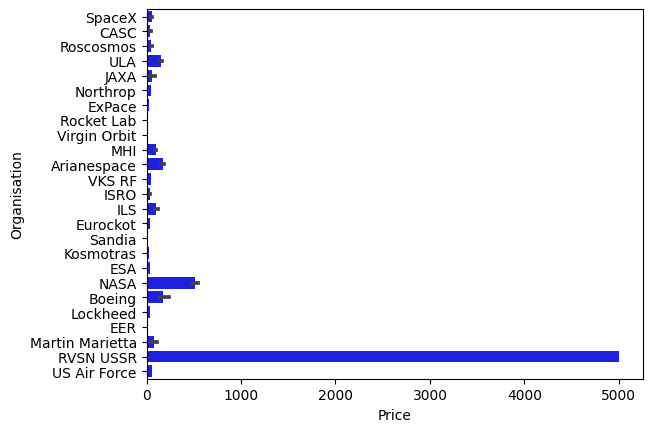

In [9]:
sns.barplot(x="Price", y="Organisation", data=df_clean,
            label="Quais empreas mais gastam", color="b")

# Analise século 21 

In [10]:
df_sec = df_clean.loc[(df_clean['Year'] >= 2000) &  (df_clean['Year'] <= 2019)]
df_sec

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,Year,Month
64,64,64,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Thu Dec 26, 2019 23:11 UTC","Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.80,Success,2019-12-26 23:11:00+00:00,2019,12
65,65,65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan","Tue Dec 24, 2019 12:03 UTC",Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.00,Success,2019-12-24 12:03:00+00:00,2019,12
67,67,67,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Fri Dec 20, 2019 03:22 UTC","Long March 4B | CBERS-4A, ETRSS-1 & Others",StatusActive,64.68,Success,2019-12-20 03:22:00+00:00,2019,12
69,69,69,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Dec 17, 2019 00:10 UTC",Falcon 9 Block 5 | JCSAT-18 / Kacific-1,StatusActive,50.00,Success,2019-12-17 00:10:00+00:00,2019,12
72,72,72,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Wed Dec 11, 2019 09:55 UTC",PSLV-QL | RISAT 2BR1,StatusActive,21.00,Success,2019-12-11 09:55:00+00:00,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,1195,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue May 16, 2000 08:27 UTC",Rokot/Briz KM | SimSat 1 & 2 (Iridium),StatusRetired,41.80,Success,2000-05-16 08:27:00+00:00,2000,5
1203,1203,1203,Northrop,"SLC-576E, Vandenberg AFB, California, USA","Sun Mar 12, 2000 09:29 UTC",Minotaur C (Taurus) | Multispectral Thermal Im...,StatusActive,45.00,Success,2000-03-12 09:29:00+00:00,2000,3
1206,1206,1206,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Feb 11, 2000 16:43 UTC",Space Shuttle Endeavour | STS-99,StatusRetired,450.00,Success,2000-02-11 16:43:00+00:00,2000,2
1210,1210,1210,Northrop,"SLC-8, Vandenberg AFB, California, USA","Thu Jan 27, 2000 03:03 UTC",Minotaur I | JAWSat,StatusActive,40.00,Success,2000-01-27 03:03:00+00:00,2000,1


## Gastos por ano no século

In [11]:
ds = df_sec['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']

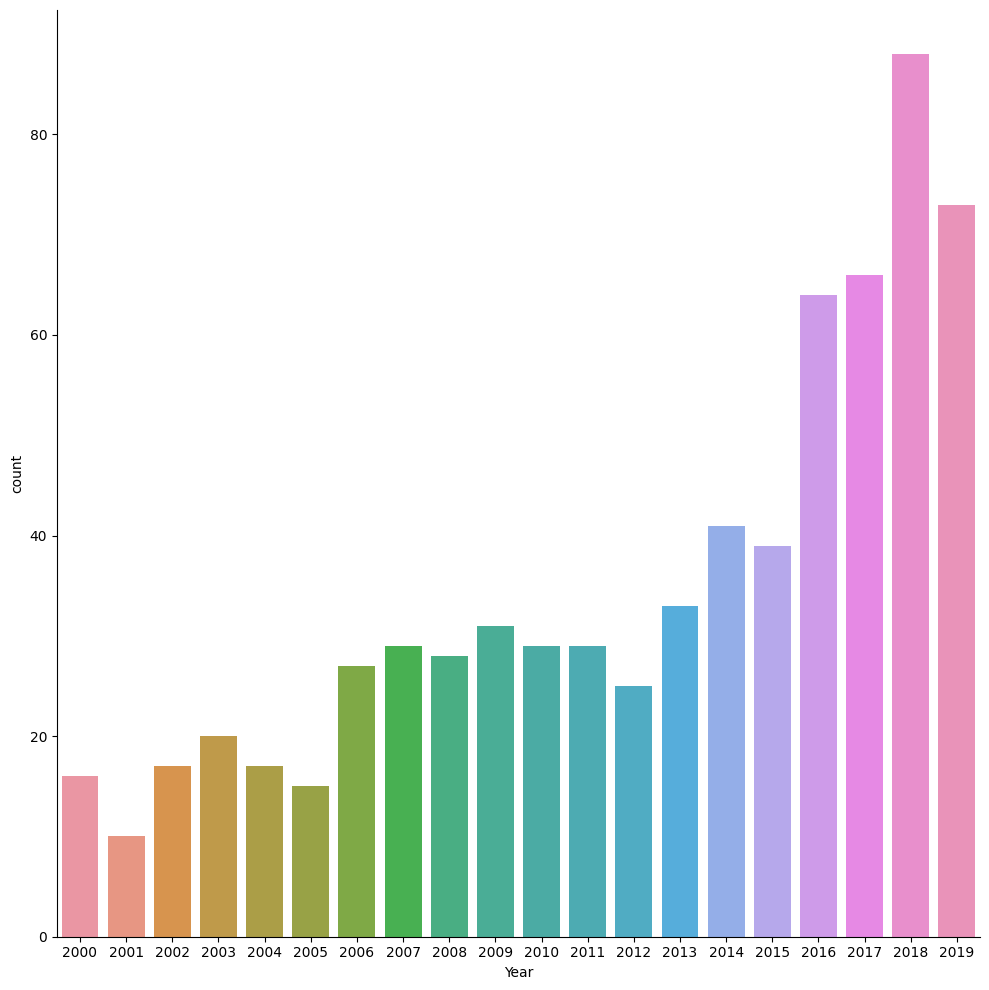

In [12]:
sns.catplot(x="Year", y="count", data= ds, kind = 'bar', height= 10)

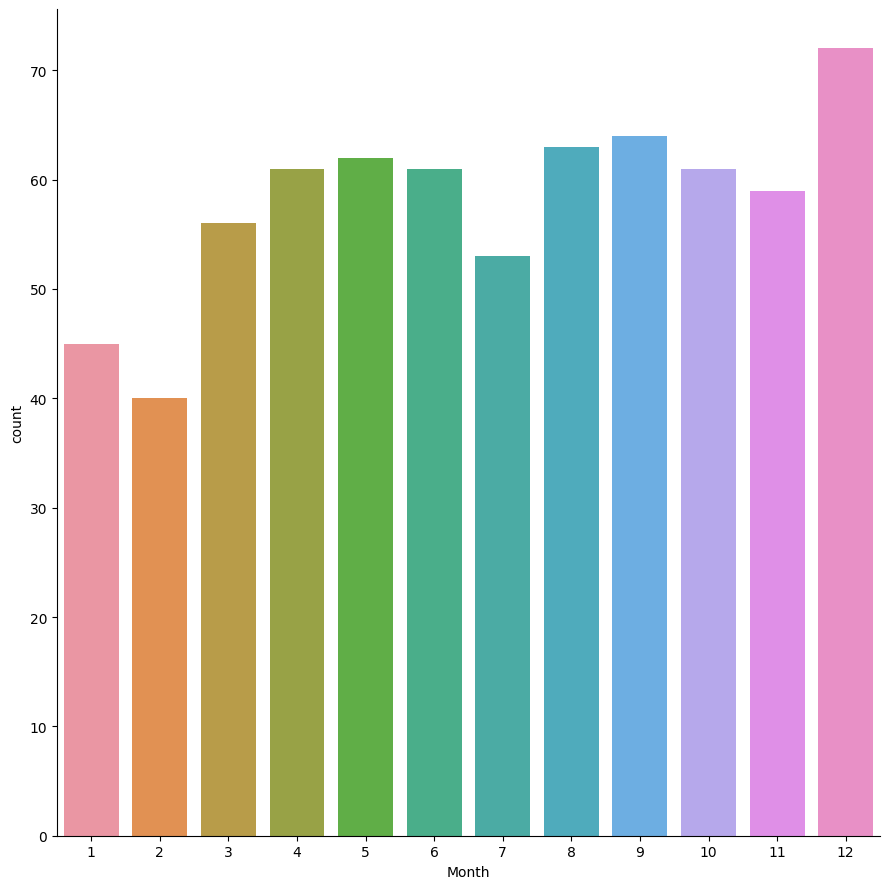

In [34]:
ds = df_sec['Month'].value_counts().reset_index()
ds.columns = ['Month', 'count']
sns.catplot(x="Month", y="count", data= ds, kind = 'bar', height= 9)

# Sucesso / falha

In [15]:
ds_status = df_sec['Mission_Status'].value_counts().reset_index()
ds_status.columns = ['Mission_Status', 'count']

In [18]:
fig = px.pie(ds_status, values='count', names='Mission_Status')
fig.show()